In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("winequality-red.csv",sep=';')
print(data.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [3]:
print(data.shape)
data.info()

(1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [5]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  


In [6]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

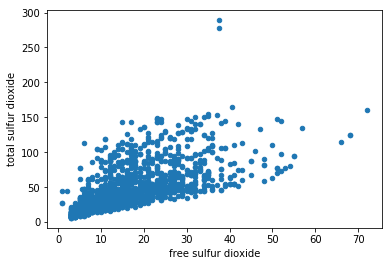

In [6]:
data.plot(kind='scatter', x='free sulfur dioxide', y='total sulfur dioxide') ;
plt.show()

In [11]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(data, hue="quality", size=10);
plt.show()

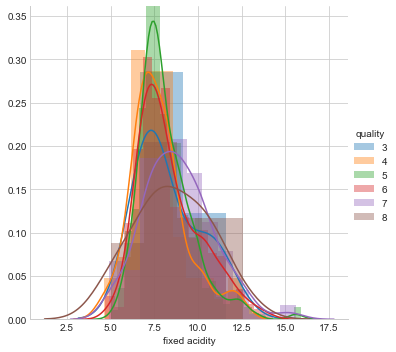

In [12]:
sns.FacetGrid(data, hue="quality", size=5) \
   .map(sns.distplot, "fixed acidity") \
   .add_legend();
plt.show();

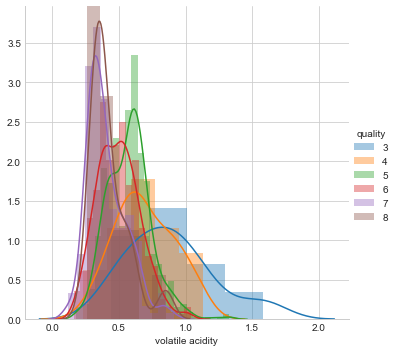

In [13]:
sns.FacetGrid(data, hue="quality", size=5) \
   .map(sns.distplot, "volatile acidity") \
   .add_legend();
plt.show(); 

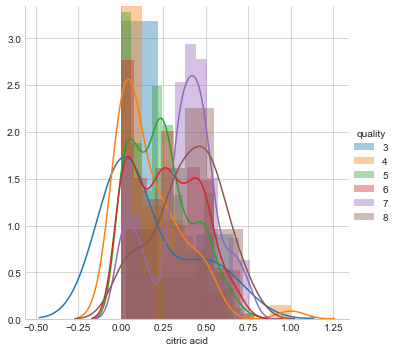

In [14]:
sns.FacetGrid(data, hue="quality", size=5) \
   .map(sns.distplot, "citric acid") \
   .add_legend();
plt.show();

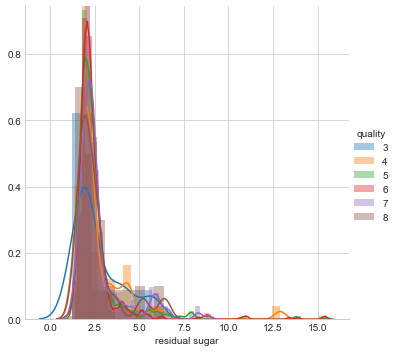

In [16]:
sns.FacetGrid(data, hue="quality", size=5) \
   .map(sns.distplot, "residual sugar") \
   .add_legend();
plt.show();

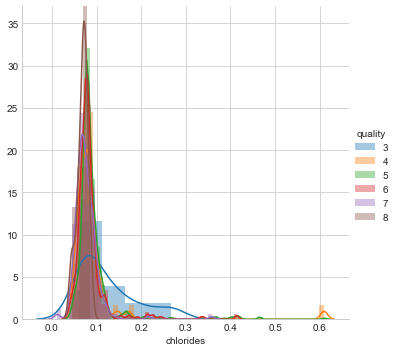

In [17]:
sns.FacetGrid(data, hue="quality", size=5) \
   .map(sns.distplot, "chlorides") \
   .add_legend();
plt.show();

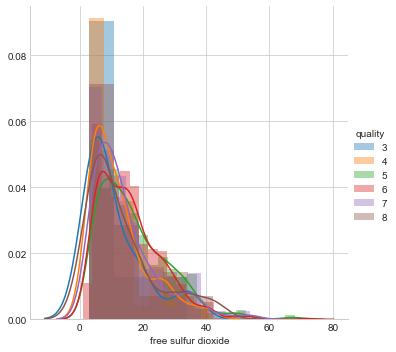

In [19]:
sns.FacetGrid(data, hue="quality", size=5) \
   .map(sns.distplot, "free sulfur dioxide") \
   .add_legend();
plt.show();

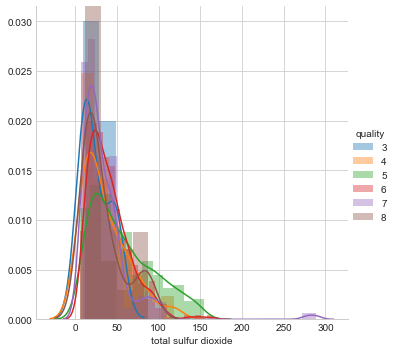

In [24]:
sns.FacetGrid(data, hue="quality", size=5) \
   .map(sns.distplot, "total sulfur dioxide") \
   .add_legend();
plt.show();

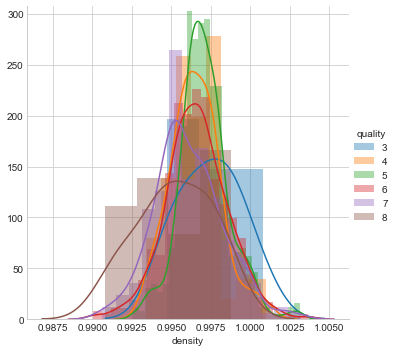

In [21]:
sns.FacetGrid(data, hue="quality", size=5) \
   .map(sns.distplot, "density") \
   .add_legend();
plt.show();

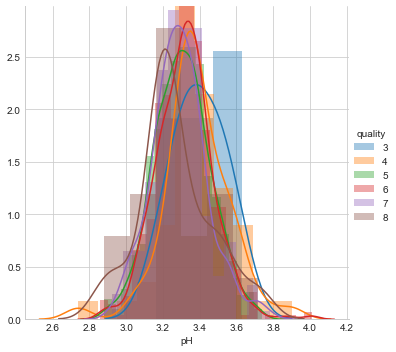

In [23]:
sns.FacetGrid(data, hue="quality", size=5) \
   .map(sns.distplot, "pH") \
   .add_legend();
plt.show();

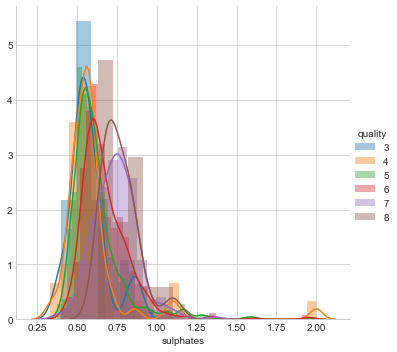

In [25]:
sns.FacetGrid(data, hue="quality", size=5) \
   .map(sns.distplot, "sulphates") \
   .add_legend();
plt.show();

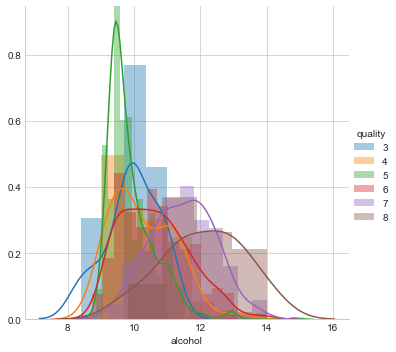

In [26]:
sns.FacetGrid(data, hue="quality", size=5) \
   .map(sns.distplot, "alcohol") \
   .add_legend();
plt.show();

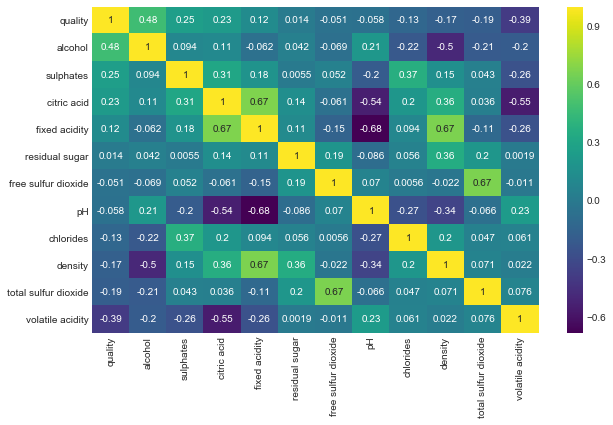

In [27]:
#Quality correlation matrix
k = 12 #number of variables for heatmap
cols = data.corr().nlargest(k, 'quality')['quality'].index
cm = data[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

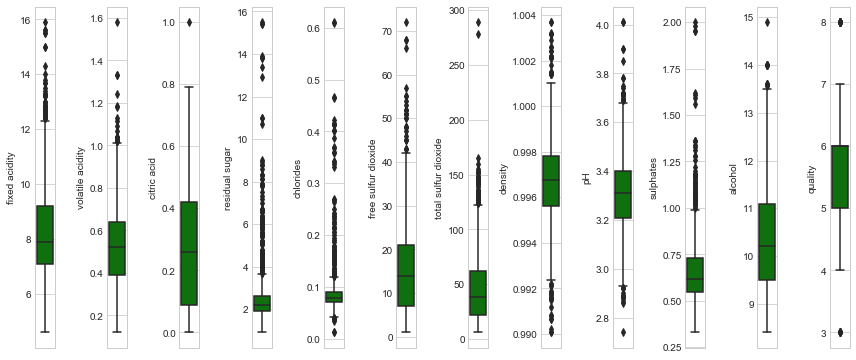

In [28]:
l = data.columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(data[l[i]],color='green',orient='v')
    plt.tight_layout()

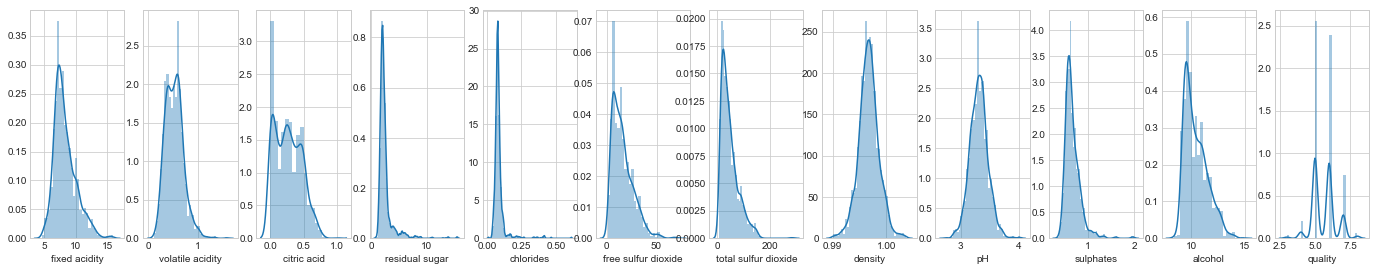

In [30]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(data[l[i]],kde=True) 

In [31]:
data.head()


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [7]:
data.drop('free sulfur dioxide',axis=1,inplace=True)
data.drop('citric acid',axis=1,inplace=True)

In [8]:
quality = data["quality"].values
category = []
for num in quality:
    if num < 5:
        category.append("Low")
    elif num > 6:
        category.append("High")
    else:
        category.append("Medium")
category = pd.DataFrame(data=category, columns=["category"])
dataf = pd.concat([data, category], axis=1)
dataf.drop(columns="quality", axis=1, inplace=True)

X = dataf.drop('category',axis=1)

y = dataf['category']

In [9]:

y[0:10]

0    Medium
1    Medium
2    Medium
3    Medium
4    Medium
5    Medium
6    Medium
7      High
8      High
9    Medium
Name: category, dtype: object

In [10]:
data1.head()

NameError: name 'data1' is not defined

In [11]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  

In [12]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  

In [13]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [15]:
y_pred = classifier.predict(X_test)  

In [16]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[ 14   1  25]
 [  0   0  11]
 [ 15   1 253]]
             precision    recall  f1-score   support

       High       0.48      0.35      0.41        40
        Low       0.00      0.00      0.00        11
     Medium       0.88      0.94      0.91       269

avg / total       0.80      0.83      0.81       320



In [17]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0,0.5,'Mean Error')

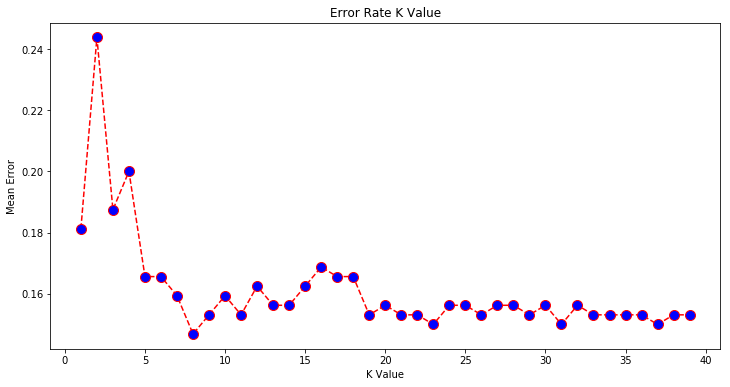

In [18]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  


In [20]:
print(accuracy_score(y_test,y_pred))

0.834375


In [48]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [49]:
y_pred = classifier.predict(X_test) 

In [50]:
print(accuracy_score(y_test,y_pred))

0.840625


In [37]:
data1.drop('free sulfur dioxide',axis=1,inplace=True)
data1.drop('citric acid',axis=1,inplace=True)

In [38]:
data1

fixed acidity  volatile acidity  residual sugar  chlorides  \
0               7.4             0.700             1.9      0.076   
1               7.8             0.880             2.6      0.098   
2               7.8             0.760             2.3      0.092   
3              11.2             0.280             1.9      0.075   
4               7.4             0.700             1.9      0.076   
5               7.4             0.660             1.8      0.075   
6               7.9             0.600             1.6      0.069   
7               7.3             0.650             1.2      0.065   
8               7.8             0.580             2.0      0.073   
9               7.5             0.500             6.1      0.071   
10              6.7             0.580             1.8      0.097   
11              7.5             0.500             6.1      0.071   
12              5.6             0.615             1.6      0.089   
13              7.8             0.610             1.6      0.114   
14              8.9             0.620             3.8      0.176   
15              8.9             0.620             3.9      0.170   
16              8.5             0.280             1.8      0.092   
17              8.1             0.560             1.7      0.368   
18              7.4             0.590             4.4      0.086   
19              7.9             0.320             1.8      0.341   
20              8.9             0.220             1.8      0.077   
21              7.6             0.390             2.3      0.082   
22              7.9             0.430             1.6      0.106   
23              8.5             0.490             2.3      0.084   
24              6.9             0.400             2.4      0.085   
25              6.3             0.390             1.4      0.080   
26              7.6             0.410             1.8      0.080   
27              7.9             0.430             1.6      0.106   
28              7.1             0.710             1.9      0.080   
29              7.8             0.645             2.0      0.082   
...             ...               ...             ...        ...   
1569            6.2             0.510             1.9      0.056   
1570            6.4             0.360             2.2      0.230   
1571            6.4             0.380             2.2      0.038   
1572            7.3             0.690             2.2      0.069   
1573            6.0             0.580             2.4      0.075   
1574            5.6             0.310            13.9      0.074   
1575            7.5             0.520             2.2      0.060   
1576            8.0             0.300             1.6      0.081   
1577            6.2             0.700             5.1      0.076   
1578            6.8             0.670             1.8      0.118   
1579            6.2             0.560             1.7      0.053   
1580            7.4             0.350             2.4      0.068   
1581            6.2             0.560             1.7      0.053   
1582            6.1             0.715             2.6      0.053   
1583            6.2             0.460             2.1      0.074   
1584            6.7             0.320             2.4      0.061   
1585            7.2             0.390             2.6      0.066   
1586            7.5             0.310             2.4      0.065   
1587            5.8             0.610             1.8      0.066   
1588            7.2             0.660             2.5      0.068   
1589            6.6             0.725             7.8      0.073   
1590            6.3             0.550             1.8      0.077   
1591            5.4             0.740             1.7      0.089   
1592            6.3             0.510             2.3      0.076   
1593            6.8             0.620             1.9      0.068   
1594            6.2             0.600             2.0      0.090   
1595            5.9             0.550             2.2      0.0

In [60]:
X=data.drop('quality',axis=1)

In [16]:
X.shape

(1599, 9)

In [56]:
X


fixed acidity  volatile acidity  residual sugar  chlorides  \
0               7.4             0.700             1.9      0.076   
1               7.8             0.880             2.6      0.098   
2               7.8             0.760             2.3      0.092   
3              11.2             0.280             1.9      0.075   
4               7.4             0.700             1.9      0.076   
5               7.4             0.660             1.8      0.075   
6               7.9             0.600             1.6      0.069   
7               7.3             0.650             1.2      0.065   
8               7.8             0.580             2.0      0.073   
9               7.5             0.500             6.1      0.071   
10              6.7             0.580             1.8      0.097   
11              7.5             0.500             6.1      0.071   
12              5.6             0.615             1.6      0.089   
13              7.8             0.610             1.6      0.114   
14              8.9             0.620             3.8      0.176   
15              8.9             0.620             3.9      0.170   
16              8.5             0.280             1.8      0.092   
17              8.1             0.560             1.7      0.368   
18              7.4             0.590             4.4      0.086   
19              7.9             0.320             1.8      0.341   
20              8.9             0.220             1.8      0.077   
21              7.6             0.390             2.3      0.082   
22              7.9             0.430             1.6      0.106   
23              8.5             0.490             2.3      0.084   
24              6.9             0.400             2.4      0.085   
25              6.3             0.390             1.4      0.080   
26              7.6             0.410             1.8      0.080   
27              7.9             0.430             1.6      0.106   
28              7.1             0.710             1.9      0.080   
29              7.8             0.645             2.0      0.082   
...             ...               ...             ...        ...   
1569            6.2             0.510             1.9      0.056   
1570            6.4             0.360             2.2      0.230   
1571            6.4             0.380             2.2      0.038   
1572            7.3             0.690             2.2      0.069   
1573            6.0             0.580             2.4      0.075   
1574            5.6             0.310            13.9      0.074   
1575            7.5             0.520             2.2      0.060   
1576            8.0             0.300             1.6      0.081   
1577            6.2             0.700             5.1      0.076   
1578            6.8             0.670             1.8      0.118   
1579            6.2             0.560             1.7      0.053   
1580            7.4             0.350             2.4      0.068   
1581            6.2             0.560             1.7      0.053   
1582            6.1             0.715             2.6      0.053   
1583            6.2             0.460             2.1      0.074   
1584            6.7             0.320             2.4      0.061   
1585            7.2             0.390             2.6      0.066   
1586            7.5             0.310             2.4      0.065   
1587            5.8             0.610             1.8      0.066   
1588            7.2             0.660             2.5      0.068   
1589            6.6             0.725             7.8      0.073   
1590            6.3             0.550             1.8      0.077   
1591            5.4             0.740             1.7      0.089   
1592            6.3             0.510             2.3      0.076   
1593            6.8             0.620             1.9      0.068   
1594            6.2             0.600             2.0      0.090   
1595            5.9             0.550             2.2      0.0

In [62]:
y=data['quality']

In [42]:
y

0       5
1       5
2       5
3       6
4       5
5       5
6       5
7       7
8       7
9       5
10      5
11      5
12      5
13      5
14      5
15      5
16      7
17      5
18      4
19      6
20      6
21      5
22      5
23      5
24      6
25      5
26      5
27      5
28      5
29      6
       ..
1569    6
1570    6
1571    6
1572    5
1573    6
1574    6
1575    6
1576    6
1577    6
1578    6
1579    5
1580    6
1581    5
1582    5
1583    5
1584    7
1585    6
1586    6
1587    6
1588    6
1589    5
1590    6
1591    6
1592    6
1593    6
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [18]:
y.shape

(1599,)

In [19]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  

In [20]:
print(X_train.shape,X_test.shape,y_train.shape)

(1279, 9) (320, 9) (1279,)


In [21]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
y_pred = svclassifier.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [24]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

0.875
[[  0   0  30]
 [  0   0  10]
 [  0   0 280]]
             precision    recall  f1-score   support

       High       0.00      0.00      0.00        30
        Low       0.00      0.00      0.00        10
     Medium       0.88      1.00      0.93       280

avg / total       0.77      0.88      0.82       320



In [25]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_train, y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
y_pred = svclassifier.predict(X_test)  
print(accuracy_score(y_test,y_pred))

0.8625


In [27]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

[[  2   0  28]
 [  0   0  10]
 [  6   0 274]]
             precision    recall  f1-score   support

       High       0.25      0.07      0.11        30
        Low       0.00      0.00      0.00        10
     Medium       0.88      0.98      0.93       280

avg / total       0.79      0.86      0.82       320



In [30]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='sigmoid')  
svclassifier.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
y_pred = svclassifier.predict(X_test)  
print(accuracy_score(y_test,y_pred))

0.875


In [ ]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='poly',degree=8)  
svclassifier.fit(X_train, y_train) 
y_pred = svclassifier.predict(X_test)  
print(accuracy_score(y_test,y_pred))

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [12]:
data1=data

In [23]:
print(scaler.fit(X_train))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [24]:
print(scaler.mean_)

[ 8.33792025  0.53028929  2.57666145  0.0874613  46.49413604  0.99676179
  3.31121188  0.65728694 10.44069586]


In [26]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)


y_pred = svclassifier.predict(X_test)



print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

0.81875
[[  0   0  46]
 [  0   0  12]
 [  0   0 262]]
             precision    recall  f1-score   support

       High       0.00      0.00      0.00        46
        Low       0.00      0.00      0.00        12
     Medium       0.82      1.00      0.90       262

avg / total       0.67      0.82      0.74       320

